# Face Recognition DataViz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import os
import zipfile
%matplotlib inline

In [2]:
import tensorflow as tf

## Import dataset 5 Celebrities

In [3]:
!gdown 1YI5ElVwG3tSY5QdqnL3z-X8RN9QVtWZM # link to download the 5 celeb zip file

Downloading...
From: https://drive.google.com/uc?id=1YI5ElVwG3tSY5QdqnL3z-X8RN9QVtWZM
To: /content/archive.zip
100% 5.28M/5.28M [00:00<00:00, 195MB/s]


In [4]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall(os.path.join(os.getcwd(),'5_celeb'))

## Import dataset PINS Face Recognition

In [5]:
!gdown 1o2TkrzwObdbmlAOHdD-h8AegGi4jcYTw

Downloading...
From: https://drive.google.com/uc?id=1o2TkrzwObdbmlAOHdD-h8AegGi4jcYTw
To: /content/pins_face.zip
100% 390M/390M [00:05<00:00, 76.7MB/s]


In [11]:
with zipfile.ZipFile('pins_face.zip', 'r') as zip_ref:
    zip_ref.extractall(os.path.join(os.getcwd()))

In [12]:
# two candidates dataset
celeb5_train = os.path.join(os.getcwd(),'5_celeb/train')
pins_face = os.path.join(os.getcwd(),'105_classes_pins_dataset')

### 5 Celeb Dataset

In [8]:
def dataset_info(img_dir):
    """
    function for getting identities and the number of corresponding images
    """
    identity = {}
    for dir in os.listdir(img_dir):
        child_dir = os.path.join(img_dir, dir)
        if os.path.isdir(child_dir):
            identity[dir]=len(os.listdir(child_dir))
    return identity


In [9]:
celeb5_train_info = dataset_info(celeb5_train)
pd.DataFrame(sorted(celeb5_train_info.items(), key=lambda x: x[1], reverse=True), columns=['identity', '#_img']).head(31)

identity  #_img
0    mindy_kaling     22
1  jerry_seinfeld     21
2         madonna     19
3      elton_john     17
4      ben_afflek     14

### Pinterest Faces Dataset

In [13]:
pins_info = dataset_info(pins_face)
pd.DataFrame(sorted(pins_info.items(), key=lambda x: x[1], reverse=True), columns=['identity', '#_img'])

identity  #_img
0      pins_Leonardo DiCaprio    237
1       pins_Robert Downey Jr    233
2     pins_Katherine Langford    226
3     pins_Alexandra Daddario    225
4        pins_elizabeth olsen    221
..                        ...    ...
101  105_classes_pins_dataset    105
102       pins_Brian J. Smith    102
103    pins_Cristiano Ronaldo     98
104      pins_Mark Zuckerberg     95
105         pins_Lionel Messi     86

[106 rows x 2 columns]

## Visualization of the 5 Celebrity Faces dataset

In [ ]:
def construct_dict(path) -> dict:
    # function to return a dict in the form {'ben_afflek':[*img_path]}
    result = {}
    for dir in os.listdir(path):
        child_dir = os.path.join(path, dir)
        result[dir] = [os.path.join(child_dir, img) for img in os.listdir(child_dir)]
    return result

In [ ]:
def data_vizualize(celebs_dict):
    """
    function for plotting images
    """
    celebs_name = list(celebs_dict)
    max_col = len(sorted(celebs_dict.items(), key=lambda x: len(x[1]), reverse=True)[0][1])
    max_row = len(celebs_name)
    figsize = (max_col*2, max_row*2)

    fig, axes = plt.subplots(max_row, max_col, figsize=figsize,
                             gridspec_kw = {'wspace':0, 'hspace':0})
    if len(celebs_name)>1:
        for i in range(len(celebs_name)):
            celeb = celebs_name[i]
            for j in range(len(celebs_dict[celeb])):
                image_path = celebs_dict[celeb][j]
                img = PIL.Image.open(image_path)
                img = img.resize((100,100))
                axes[i,j].imshow(img)
                axes[i,j].axis('off')
            for j in range(len(celebs_dict[celeb]), max_col):
                fig.delaxes(axes[i, j])
    else:
        celeb = celebs_name[0]
        for j in range(len(celebs_dict[celeb])):
                image_path = celebs_dict[celeb][j]
                img = PIL.Image.open(image_path)
                img = img.resize((100,100))
                axes[j].imshow(img)
                axes[j].axis('off')

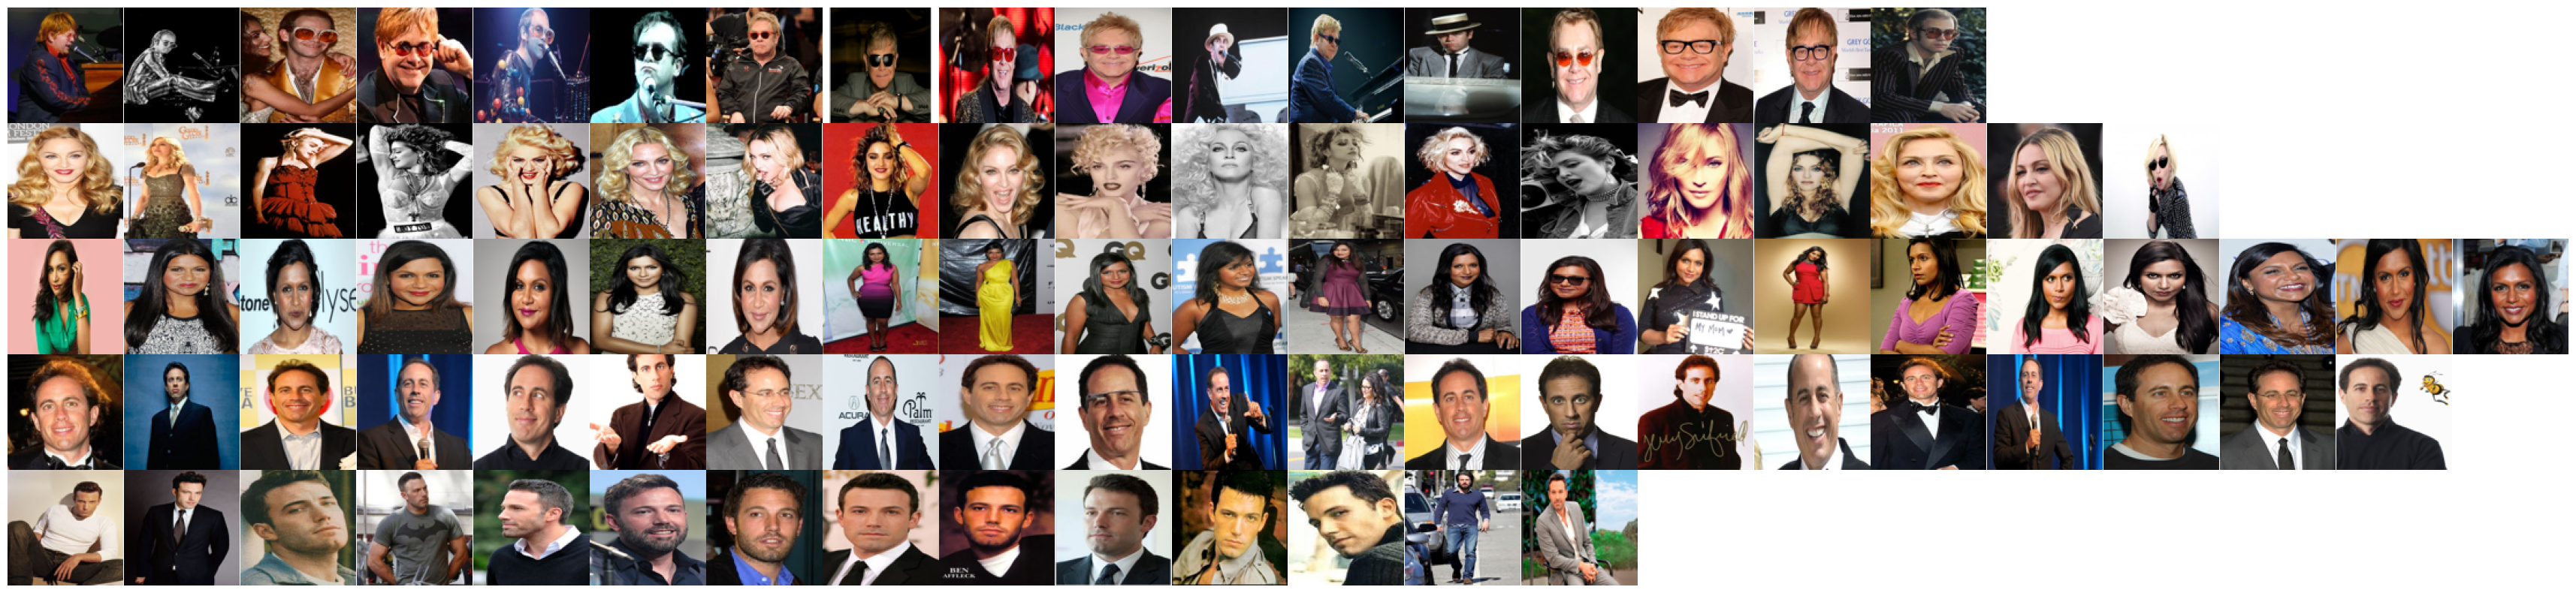

In [ ]:

celebs_train_dict = construct_dict(celeb5_train)
data_vizualize(celebs_dict=celebs_train_dict)

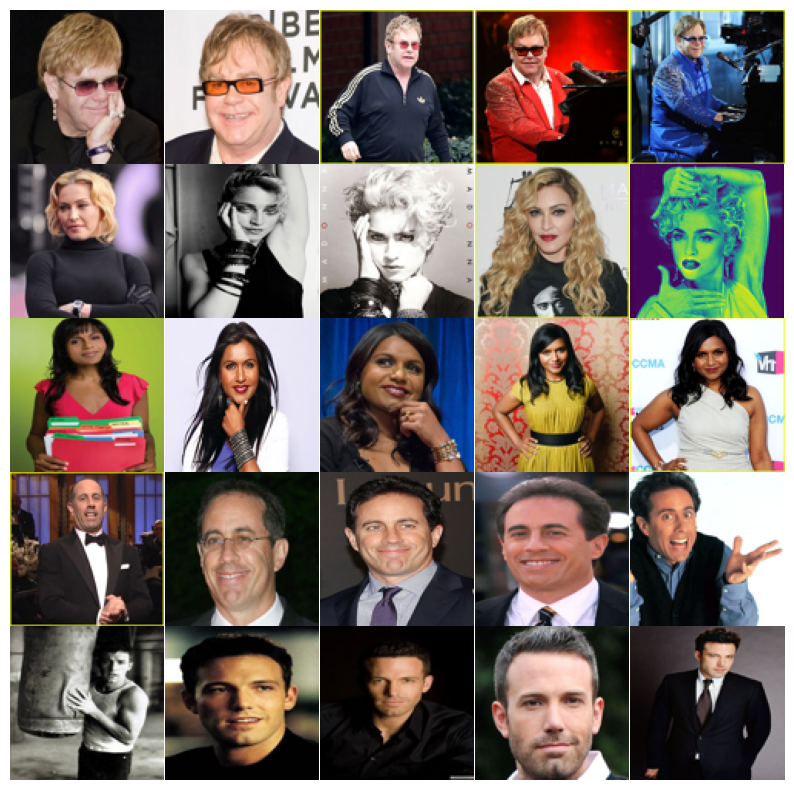

In [ ]:
celebs_val_path = os.path.join(os.getcwd(),'5_celeb/val')
celebs_val_dict = construct_dict(celebs_val_path)
data_vizualize(celebs_dict=celebs_val_dict)


## Potential Issues with the 5 Celebrity Dataset

### 1. RGB vs gray-scale

In [ ]:
def pick_image(data_dir, identities=['ben_afflek'], image_index=[[5,6]]) -> dict:
    ### pick image paths based on the identity and images position

    return {identity:[data_dir[identity][i] for i in image_index] for identity, image_index in zip(identities, image_index)}

In [ ]:
sample1 = pick_image(celebs_train_dict, identities=['madonna', 'elton_john'], image_index=[[0, 9, 12, 14, 3, 10, 11, 13], [0, 1]])

fig, axes = plt.subplots(2, 5, figsize=(10,4),
                             gridspec_kw = {'wspace':0, 'hspace':0})

name = 'madonna'
for j in range(len(sample1[name])):
    image_path = sample1[name][j]
    img = PIL.Image.open(image_path)
    img = img.resize((100,100))
    axes[j//4,j%4].imshow(img)
    axes[j//4,j%4].axis('off')

name = 'elton_john'
for j in range(len(sample1[name])):
    image_path = sample1[name][j]
    img = PIL.Image.open(image_path)
    img = img.resize((100,100))
    axes[j,4].imshow(img)
    axes[j,4].axis('off')

### 2. Front view vs Rear view

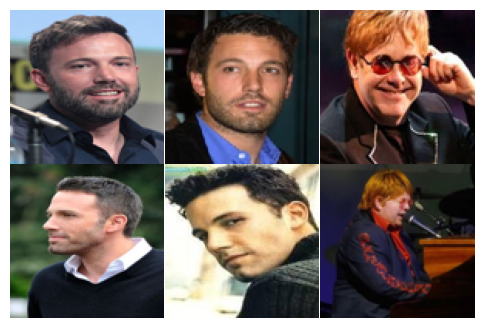

In [ ]:
sample2 = pick_image(celebs_train_dict, identities=['ben_afflek', 'elton_john'], image_index=[[5, 6, 4, 11], [3, 0]])
fig, axes = plt.subplots(2, 3, figsize=(6,4),
                             gridspec_kw = {'wspace':0, 'hspace':0})

name = 'ben_afflek'

for j in range(len(sample2[name])):
    image_path = sample2[name][j]
    img = PIL.Image.open(image_path)
    img = img.resize((100,100))
    axes[j//2,j%2].imshow(img)
    axes[j//2,j%2].axis('off')

name = 'elton_john'
for j in range(len(sample2[name])):
    image_path = sample2[name][j]
    img = PIL.Image.open(image_path)
    img = img.resize((100,100))
    axes[j,2].imshow(img)
    axes[j,2].axis('off')

### 3. Near face vs whole-body

In [ ]:
identities = ['ben_afflek', 'mindy_kaling', 'jerry_seinfeld','madonna','elton_john']
index = [[2,0], [4,15], [9,1], [16,1], [14,6]]
sample3 = pick_image(celebs_train_dict, identities=identities, image_index=index)

fig, axes = plt.subplots(2, 5, figsize=(10,4),
                             gridspec_kw = {'wspace':0, 'hspace':0})

i=0
for name in sample3.keys():
    j=0
    for path in sample3[name]:
        img = PIL.Image.open(path)
        img = img.resize((100,100))
        axes[j,i].imshow(img)
        axes[j,i].axis('off')
        j+=1
    i+=1


### 4. Appearance of other faces

(-0.5, 199.5, 199.5, -0.5)

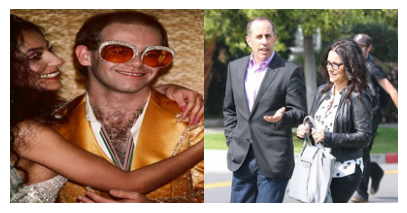

In [ ]:
sample4 = pick_image(celebs_train_dict, identities=['elton_john', 'jerry_seinfeld'], image_index=[[2], [11]])
_, ax = plt.subplots(1,2, figsize=(5,5),gridspec_kw = {'wspace':0, 'hspace':0})
ax[0].imshow(PIL.Image.open(sample4['elton_john'][0]).resize((200,200)))
ax[0].axis('off')
ax[1].imshow(PIL.Image.open(sample4['jerry_seinfeld'][0]).resize((200,200)))
ax[1].axis('off')

## Visualization of the Pinterest Faces dataset

In [ ]:
# randomly pick 40 images in Pinterest Faces Dataset
import random

pins_dict = construct_dict(pins_face)
img_path = []
for name in pins_dict.keys():
    img_path.append(random.choice(pins_dict[name]))
random.shuffle(img_path)
img_path = img_path[:40]

In [ ]:
fig, axes = plt.subplots(5, 8, figsize=(16,10),
                             gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(len(img_path)):
    image = PIL.Image.open(img_path[i])
    image = image.resize((100,100))
    axes[i//8,i%8].imshow(image)
    axes[i//8,i%8].axis('off')


